<a href="https://colab.research.google.com/github/Alejandro405/tfg/blob/main/unsw_nb15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd
!pip install ydata_profiling --quiet
from ydata_profiling import ProfileReport
from ydata_profiling.config import Settings
import requests

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import os
import json

# add the column labels
kdd_columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'Class'])

def get_country_from_ip(ip):
    url = 'http://ip-api.com/json/' + ip
    response = requests.get(url)
    data = response.json()

    try:
        res = data['country']
    except:
        res = data['message']

    return res

def save_file(json_data, file_path):
  with open(file_path, 'w') as out:
    json.dump(json_data, out)


def freq_encoding(data):
  for cat_var in [idx for idx, dtype in data.dtypes.items() if dtype == 'object']:
    # Calcular la frecuencia de cada categoría
    frecuencias = data[cat_var].value_counts(normalize=True)

    # Mapear las frecuencias a las categorías y reemplazar en el DataFrame original
    data[cat_var] = data[cat_var].map(frecuencias)

  return (data)

seed = 42

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.7 MB/s eta 0:00:00


In [ ]:
!du -aH ./drive/MyDrive/cse-cic/*.csv

255429	./drive/MyDrive/cse-cic/cleared_cse-cic_sampled.csv
486841	./drive/MyDrive/cse-cic/cse-cic.csv
247009	./drive/MyDrive/cse-cic/cse-cic_sampled.csv
250104	./drive/MyDrive/cse-cic/depured_cse_cic.csv
215924	./drive/MyDrive/cse-cic/EDAdepured_cse-cic.csv
250102	./drive/MyDrive/cse-cic/final_cse-cic.csv
229944	./drive/MyDrive/cse-cic/variables.csv


In [ ]:
!cat /content/drive/MyDrive/nsl-kdd/nsl-kdd.csv | head

duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal
0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,anomaly
0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.0,0.0,0.0,30,255,1.0,0.0,0.03,0.04,0.03,0

In [ ]:
#dataset_name = 'cse-cic'
dataset_name = 'unsw-nb15'
#dataset_name = 'nsl-kdd'

data_file = 'df.csv'
#data_file = f'{dataset_name}.csv'
#data_file = 'cleared_cse-cic_sampled.csv'
#data_file = 'cse-cic.csv'

df = pd.read_csv(f'./drive/MyDrive/{dataset_name}/{data_file}', low_memory=True, memory_map=True)
#df.drop(columns=['Unnamed: 0'], inplace=True)
#df.columns = kdd_columns
df.head()

<ipython-input-2-7d26f8ab94df>:10: DtypeWarning: Columns (1,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'./drive/MyDrive/{dataset_name}/{data_file}', low_memory=True, memory_map=True)


,srcip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label,duration
0,Japan,53,udp,CON,0.000986,146,178,31,29,0,...,13,13,6,7,1,1,2,Normal,0,0
1,Japan,14724,tcp,FIN,0.038480,8928,320,31,29,4,...,8,20,7,5,1,1,4,Normal,0,0
2,Japan,53,udp,CON,0.001026,130,162,31,29,0,...,8,13,6,5,1,1,1,Normal,0,0
3,Japan,5190,tcp,FIN,0.005645,1064,2260,31,29,4,...,13,9,1,7,2,1,1,Normal,0,0
4,Japan,80,tcp,FIN,0.020018,1036,824,31,29,2,...,18,13,6,5,2,1,1,Normal,0,0


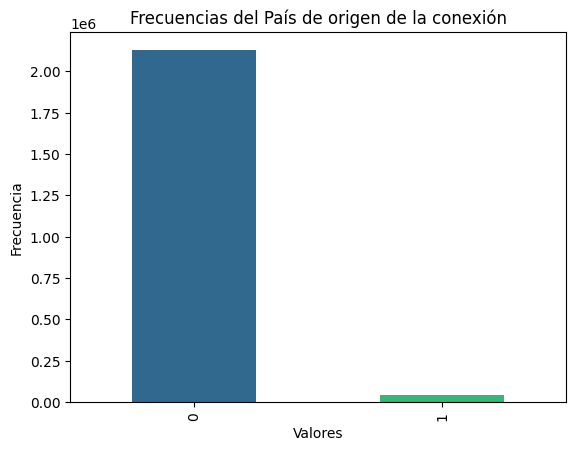

In [ ]:
import matplotlib.pyplot as plt


frec = df['Label'].value_counts()

colors = sns.color_palette('viridis', len(frec))

frec.plot(kind='bar', color=colors)
plt.title('Frecuencias del País de origen de la conexión')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

plt.show()

In [ ]:
df.to_csv(f'./drive/MyDrive/{dataset_name}/{data_file}', index=False, header=True)
df = pd.read_csv(f'./drive/MyDrive/{dataset_name}/{data_file}')

In [ ]:
for col in df.columns:
    df = df[~df[col].isin([col])]

df.reset_index(drop=True, inplace=True)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

sampled_df = df.groupby('Label').apply(lambda x: x.sample(frac=.25))

In [ ]:
X = df.groupby('Label').apply(lambda x: x.sample(frac=.25)).drop('Label', axis=1)

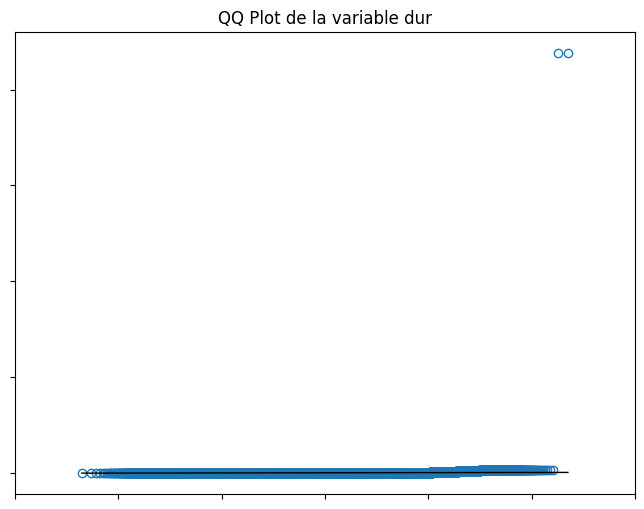

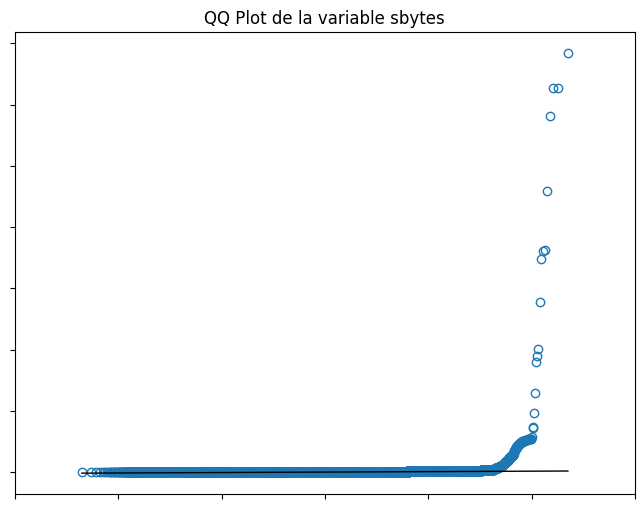

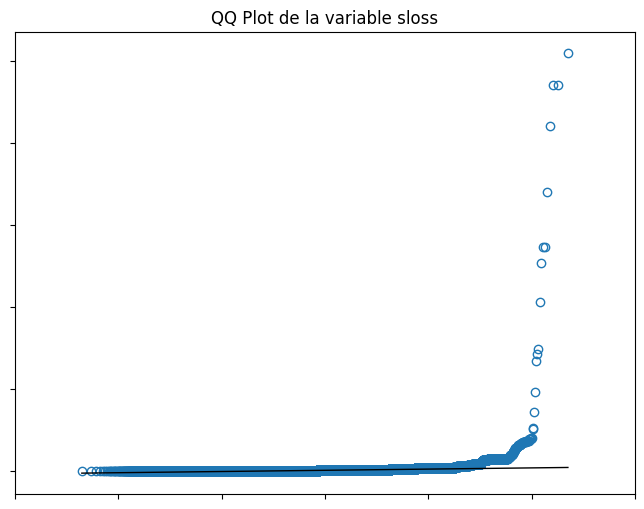

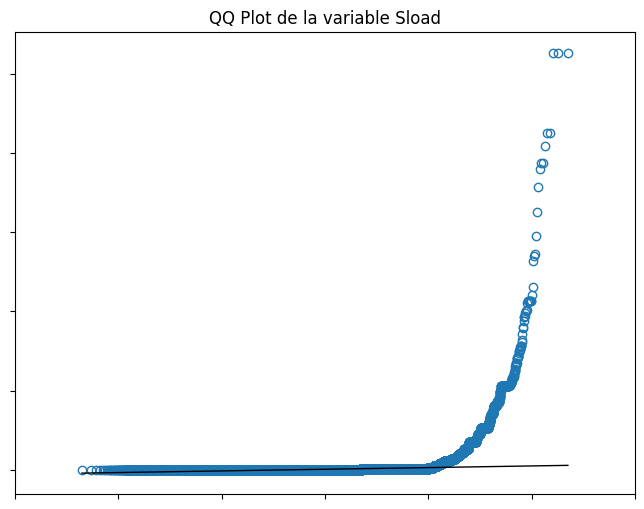

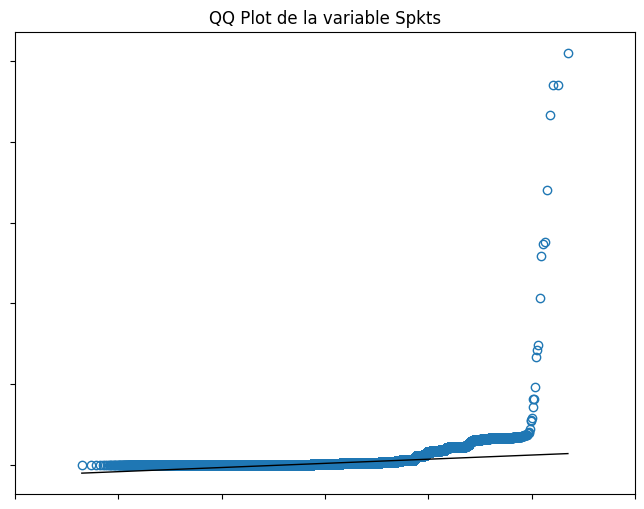

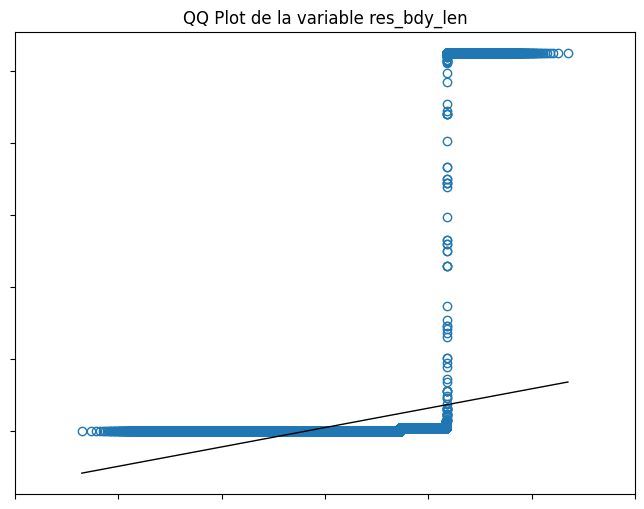

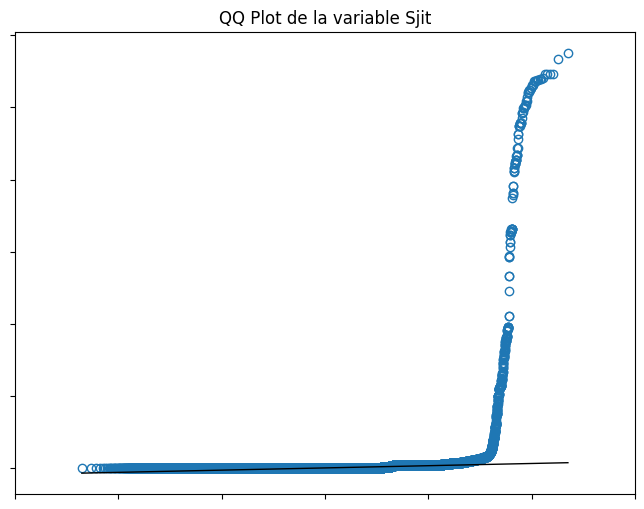

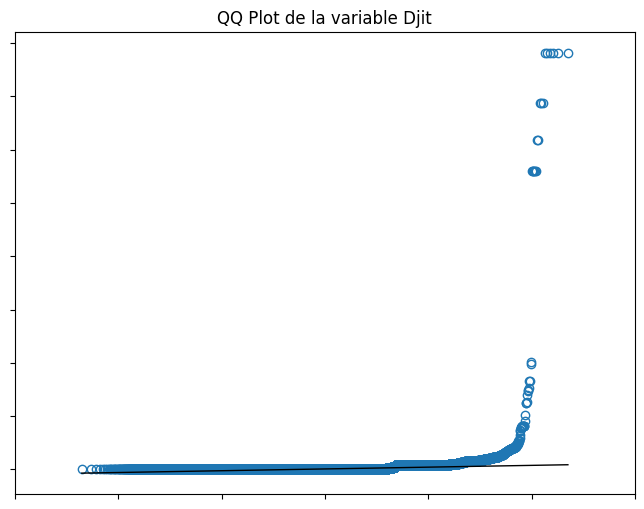

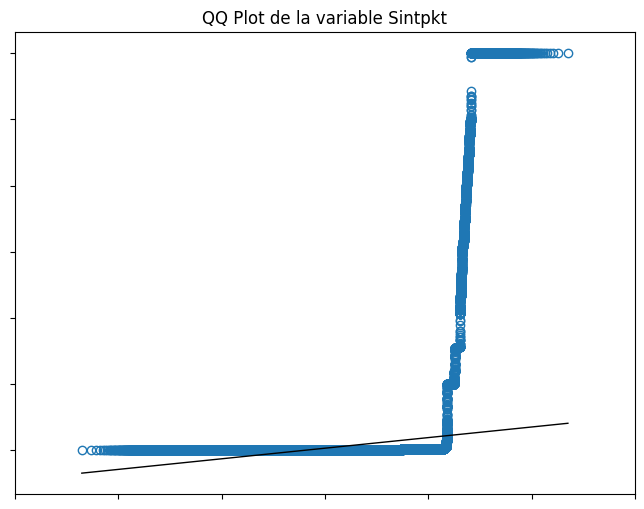

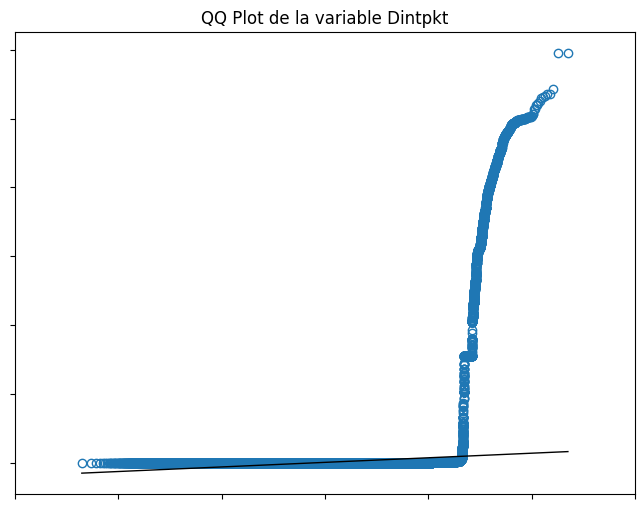

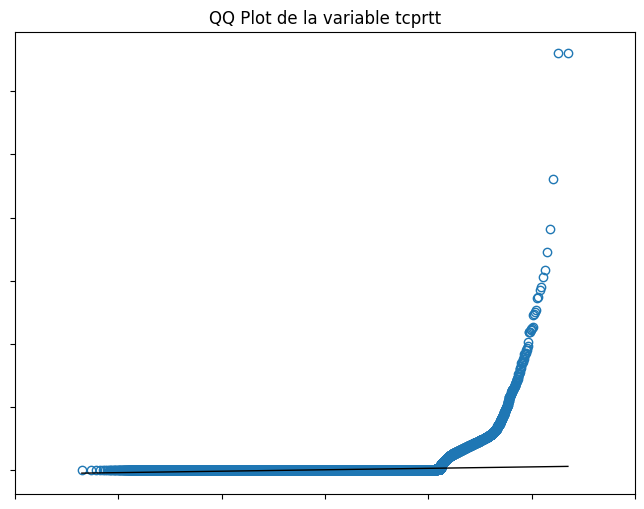

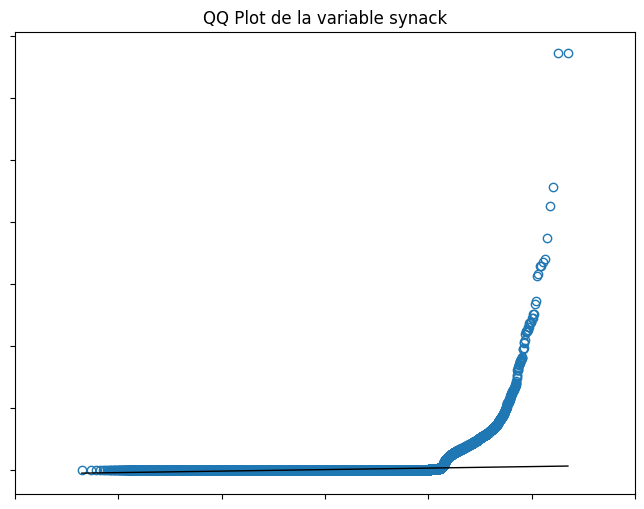

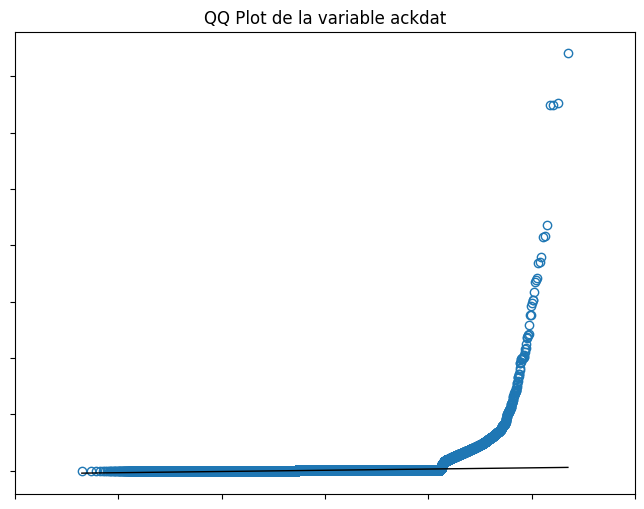

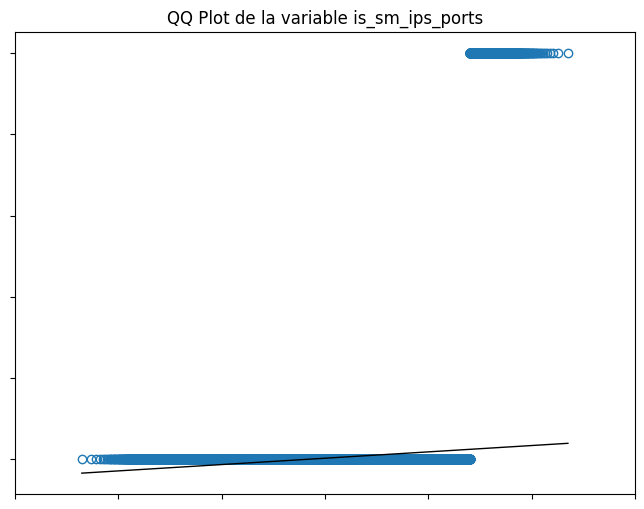

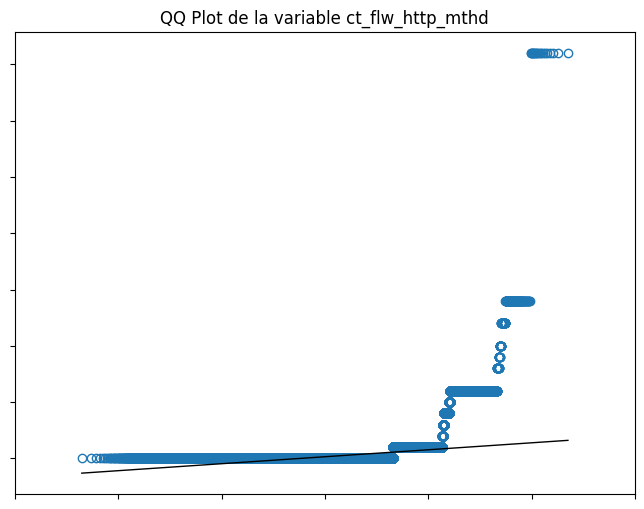

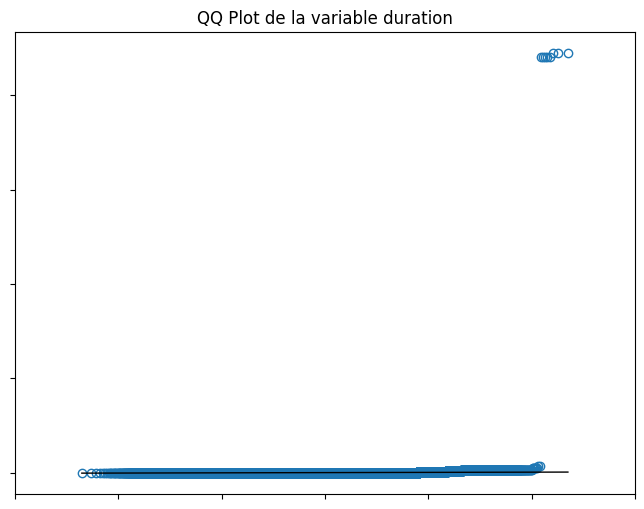

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

for var in sesgadas:
    plt.figure(figsize=(8, 6))
    (osm, osr), (slope, intercept, r) = stats.probplot(sampled_df[var], dist="norm")
    plt.plot(osm, osr, 'o', markerfacecolor='none', markeredgecolor='#1f77b4')
    plt.plot(osm, slope*osm + intercept, color='black', lw=1)
    plt.title('QQ Plot de la variable ' + var)
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=False)
    plt.grid(False)

    plt.xlim([-6, 6])  # Set x-axis limits
    # Save the figure before calling plt.show()
    plt.savefig(f'{var.replace("/", "_")}_qqplot.png', dpi=300, bbox_inches='tight')

    plt.show()

In [ ]:
!zip  qqplots_unsw.zip *.png

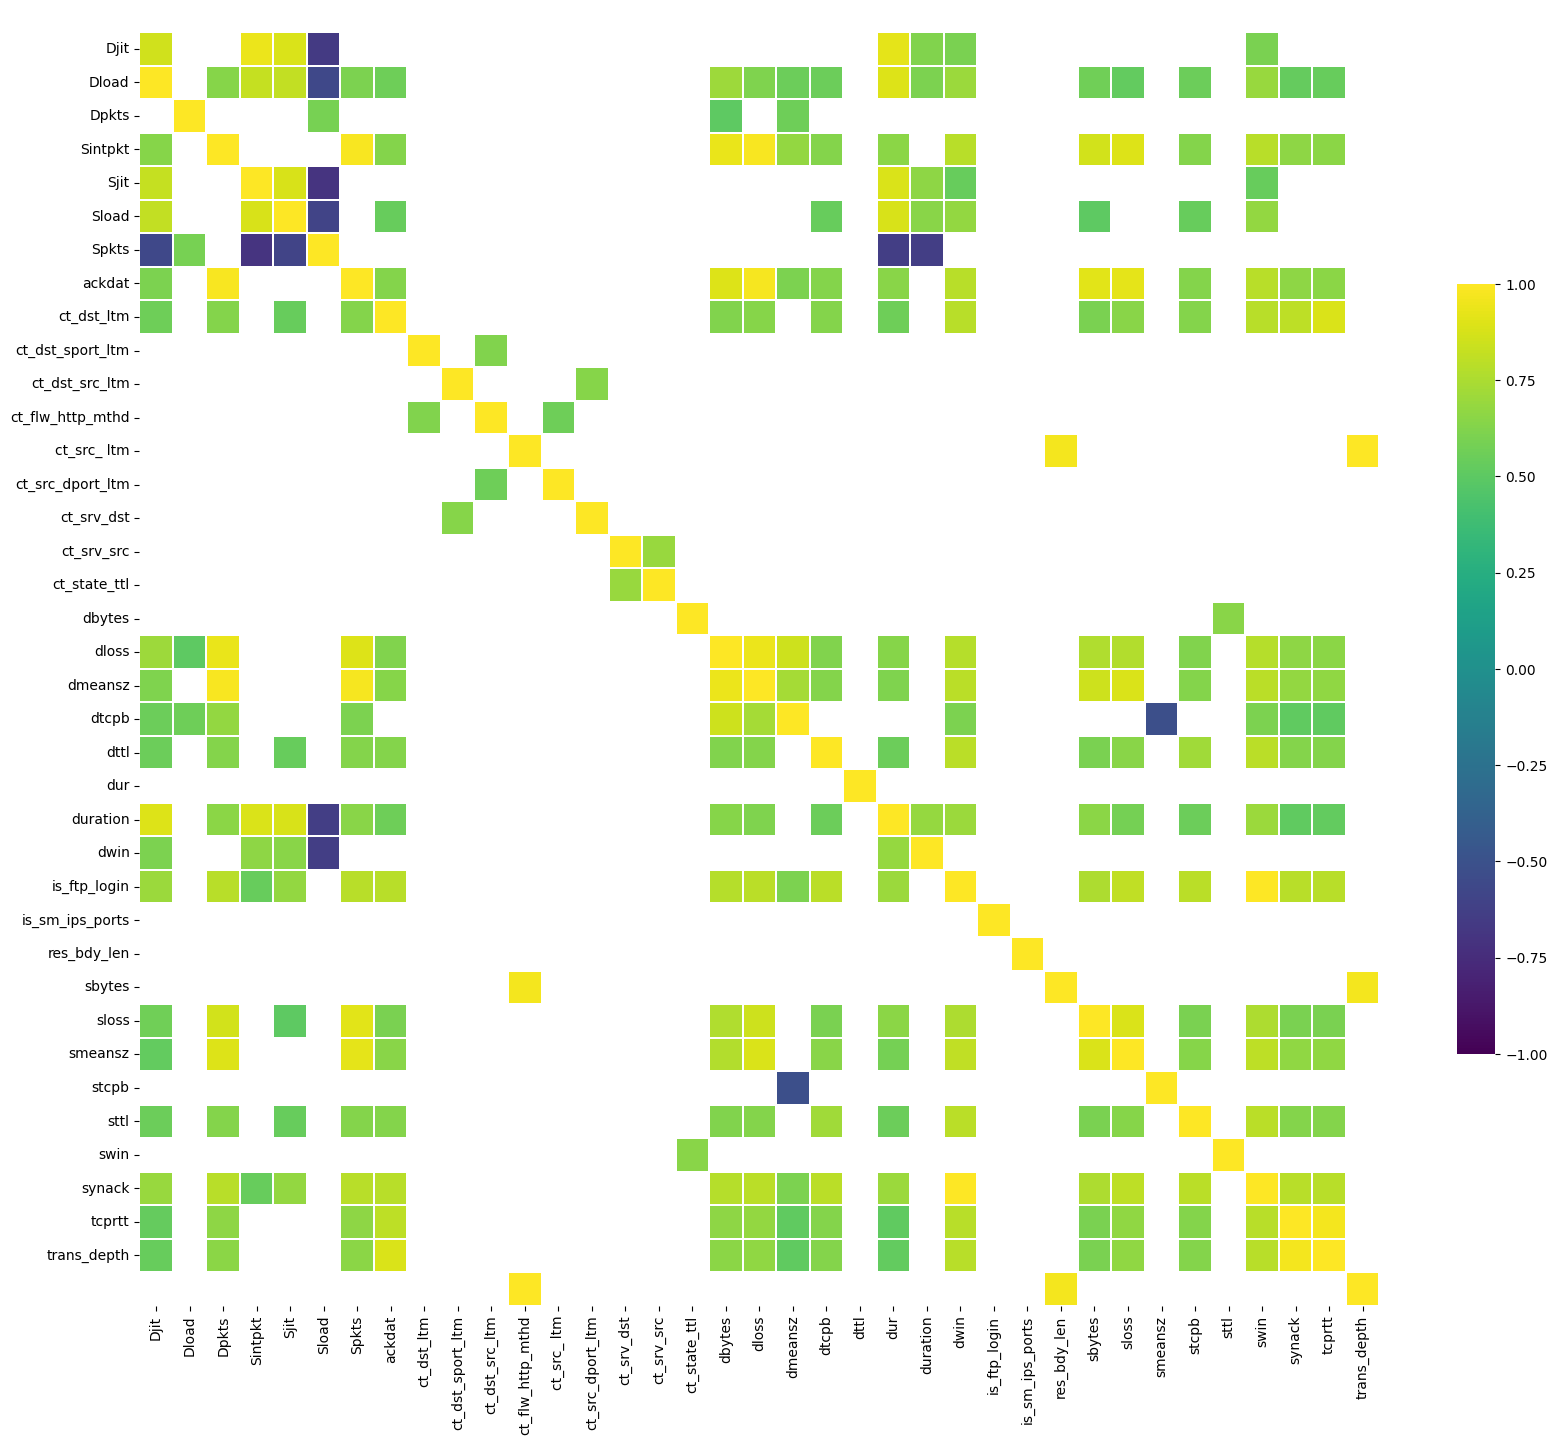

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

matriz_correlacion = pd.read_csv('/content/drive/MyDrive/unsw-nb15/results/corr_matrix.csv', index_col=0)

plt.figure(figsize=(20, 20))

# Generar el heatmap
sns.heatmap(matriz_correlacion[(matriz_correlacion >= 0.5) | (matriz_correlacion <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.3,
            annot=False, square=True, cbar_kws={'shrink': .5},
            xticklabels=matriz_correlacion.columns, yticklabels=matriz_correlacion.columns)

plt.ylabel('')
plt.xlabel('')

# Aumentar el tamaño de la fuente de las etiquetas de los ejes
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Título del gráfico
plt.title('  ')

# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder



# Calcular la matriz de correlación
matriz_correlacion = df.corr()

plt.figure(figsize=(30, 30))

sns.heatmap(matriz_correlacion[(matriz_correlacion >= 0.5) | (matriz_correlacion <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.3,
            annot=False, square=True, cbar_kws={'shrink': .5})

# Aumentar el tamaño de la fuente de las etiquetas de los ejes
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)

plt.title('  ')

plt.show()

ValueError: could not convert string to float: 'Japan'

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Procedimiento para generar el gráfico 2D t-SNE
def plot_tsne(X, perplexity=30, learning_rate=200, n_iter=1000, random_state=42):
    """
    Genera un gráfico 2D t-SNE para demostrar la no linealidad del dataset.

    Parámetros:
    - X: DataFrame de pandas con las variables predictoras.
    - perplexity: Perplejidad de t-SNE (default=30).
    - learning_rate: Tasa de aprendizaje de t-SNE (default=200).
    - n_iter: Número de iteraciones para la optimización (default=1000).
    - random_state: Estado aleatorio para reproducibilidad (default=42).
    """

    # Configuración y ajuste de t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=random_state)
    X_embedded = tsne.fit_transform(X)

    # Crear el gráfico
    plt.figure(figsize=(10, 8))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c='blue', cmap='viridis')
    plt.title(f'Gráfico 2D t-SNE - {dataset_name}')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()

plot_tsne(X)

In [ ]:
!zip  qqplots.zip *.png

In [ ]:
random_state = 42

sampled_df = df.groupby('Label').apply(lambda x: x.sample(frac=.25))

cfg = Settings()
cfg.infer_dtypes = False
cfg.correlations["auto"].calculate = True
cfg.correlations["pearson"].calculate = False
cfg.correlations["spearman"].calculate = False  # No calcular correlaciones de Spearman
cfg.correlations["kendall"].calculate = False  # No calcular correlaciones de Kendall
cfg.correlations["phi_k"].calculate = False  # No calcular coeficiente de correlación phi_k
cfg.correlations["cramers"].calculate = False  # No calcular coeficiente de correlación Cramers
cfg.interactions.continuous = False
cfg.missing_diagrams["bar"] = False
cfg.missing_diagrams["heatmap"] = False  # Mantener heatmap para visualizar valores perdidos
cfg.missing_diagrams["matrix"] = False
cfg.samples.tail = 0
cfg.samples.random = 0

profile = ProfileReport(
    sampled_df.drop('Label', axis=1),
    title='UNSW - EDA',
    config=cfg
)

In [ ]:
#profile.to_file(f'./drive/MyDrive/{dataset_name}/EDA_UNSW-NB15.html')
profile.to_file(f'./EDA.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

In [ ]:
umbral = 0.9

ceros_por_columna = (df == 0).sum() / len(df)
caracteristicas_a_eliminar = ceros_por_columna[ceros_por_columna > umbral].index
df.drop(columns=caracteristicas_a_eliminar, inplace=True)

df.drop_duplicates(subset=df.columns)

In [ ]:
df.head()

## EDA

In [ ]:
# Ver las variables con alertas por ceros
zero_vars = []
skewed_vars = []

# Iterar sobre las variables en el reporte
for variable in profile.description_set.variables:
    prop = profile.description_set.variables.get(variable)
    # Verificar si la variable tiene la clave 'p_zeros'
    if 'p_zeros' in prop and prop['p_zeros'] > 0.9:
        zero_vars.append(variable)
    if 'skewness' in prop and prop['skewness'] >= 10:
        skewed_vars.append(variable)


import json

aux = {
    "sesgadas" : skewed_vars,
    "zero_vars" : zero_vars
}

dst_file = f'./drive/MyDrive/{dataset_name}/results/var_report.json'
with open(dst_file, 'w') as file:
  json.dump(aux, file)

## Eliminación de variables



In [ ]:
from sklearn.preprocessing import OneHotEncoder

sampled_df = df.groupby('Label', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=42))
#sampled_df.rename(columns={'Label':'Class'})

enc = OneHotEncoder(handle_unknown='ignore')
label_encoder = LabelEncoder()

categ = [idx for idx, dtype in df.dtypes.items() if dtype == 'object']
numer = [idx for idx, dtype in df.dtypes.items() if dtype != 'object']


print(categ)
print(numer)

['srcip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat']
['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label', 'duration']


In [ ]:
X = sampled_df.drop(columns=categ, inplace=False).dropna()
#X = freq_encoding(sampled_df.drop(columns=['duration', 'attack_cat', 'Class'])).dropna()
y = sampled_df.dropna()['Label']

In [ ]:
X.head(15)

### Eliminación por correlacion

In [ ]:
# Calcular la matriz de correlación
# df_numerical = label_encoder.fit_transform(df['Label'])
sampled_df = df.copy()
sampled_df = freq_encoding(sampled_df).dropna()

matriz_correlacion = sampled_df.corr()

correlacion_objetivo = matriz_correlacion["Label"].abs() > 0.65
variables_interesantes_objetivo = matriz_correlacion.columns[correlacion_objetivo].tolist()

# Seleccionar las variables con una correlación alta entre sí
correlacion_entre_variables = (matriz_correlacion.abs() > 0.65) & (matriz_correlacion.abs() < 1.0)
variables_interesantes_entre_variables = []
for columna in correlacion_entre_variables:
    variables_correlacionadas = matriz_correlacion.index[correlacion_entre_variables[columna]].tolist()
    variables_interesantes_entre_variables.extend(variables_correlacionadas)

# Combinar las variables seleccionadas
variables_interesantes = variables_interesantes_objetivo
candidatos_eliminar = list(set(variables_interesantes_entre_variables))

if "Label" in candidatos_eliminar:
    candidatos_eliminar.remove("Label")

In [ ]:
import json

aux = {
    "candidatos_eliminar": candidatos_eliminar,
    "variables_interesantes_objetivo": variables_interesantes_objetivo
}
with open(f'./drive/MyDrive/{dataset_name}/eliminacion_correlacion.json', 'w') as out:
  json.dump(aux, out)

aux

### Eliminación por Significación Estadística

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [ ]:
filas_con_infinitos = X[X.isin([np.inf, -np.inf]).any(axis=1)]
num_filas_con_infinitos = filas_con_infinitos.shape[0]

In [ ]:
# Selección univariante
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
import math

id_scores = dict(zip(X.columns, selector.scores_))
id_scores = dict(sorted(id_scores.items(), key=lambda x: x[1], reverse=True))

# Definir el percentil deseado
percentile_threshold = 50

# Calcular el valor del percentil
scores = [x for x in list(id_scores.values()) if not math.isnan(x)]
percentile_value = np.percentile(scores, percentile_threshold)

# Filtrar las características basadas en el percentil
KBest_features = [feature for feature, score in id_scores.items() if score >= percentile_value]

KBest_features.remove('Label')

In [ ]:
KBest_features

['sttl',
 'ct_state_ttl',
 'dttl',
 'ackdat',
 'tcprtt',
 'synack',
 'Sload',
 'ct_dst_sport_ltm',
 'dmeansz',
 'ct_src_dport_ltm',
 'Dload',
 'swin',
 'dwin',
 'Sjit',
 'dtcpb',
 'stcpb',
 'ct_dst_src_ltm',
 'Dpkts',
 'Spkts']

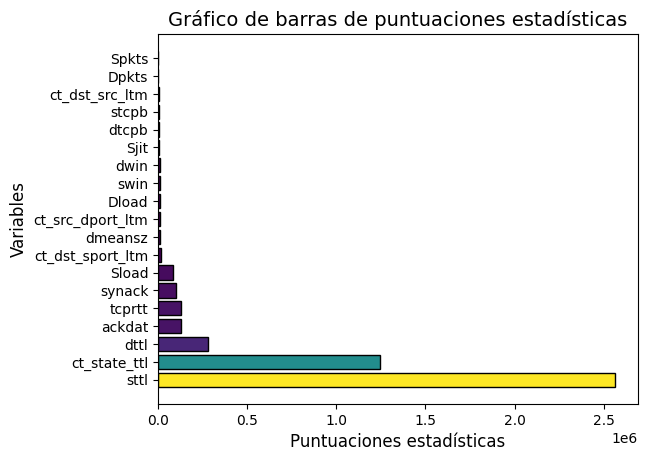

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Obtener las puntuaciones estadísticas
scores = [id_scores[x] for x in KBest_features]
normalized_scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))

# Crear una paleta de colores con seaborn
palette = sns.color_palette("viridis", as_cmap=True)
plt.barh(KBest_features, scores, color=palette(normalized_scores), edgecolor='black')

plt.ylabel('Variables', fontsize=12)
plt.xlabel('Puntuaciones estadísticas', fontsize=12)
plt.title('Gráfico de barras de puntuaciones estadísticas', fontsize=14)
plt.subplots_adjust(left=0.15)

plt.show()

In [ ]:
results = {
    "raw": [id_scores, dict(zip(X.columns, selector.pvalues_))],
    "filtered": KBest_features
}

save_file(results, f'./drive/MyDrive/{dataset_name}/results/kBest.json')

In [ ]:
!cat ./drive/MyDrive/cse-cic/results/kBest.json

{"raw": [{"Fwd Act Data Pkts": 353211.34778049274, "Subflow Fwd Pkts": 348567.9190424683, "Tot Fwd Pkts": 348567.9190424683, "Fwd Header Len": 314520.22709019756, "Subflow Fwd Byts": 109731.10038714805, "TotLen Fwd Pkts": 109731.10038714805, "Bwd IAT Mean": 7582.568675611897, "Fwd Seg Size Min": 6860.541029336929, "Bwd IAT Min": 6697.836234097839, "Init Fwd Win Byts": 5286.601868769875, "ECE Flag Cnt": 2929.4374662424757, "RST Flag Cnt": 2929.4374662424757, "ACK Flag Cnt": 2855.8603411349754, "PSH Flag Cnt": 1778.7154279837848, "Bwd IAT Max": 1499.0616029173377, "Dst Port": 1317.587584674088, "Fwd Pkt Len Max": 1270.0636508513594, "Bwd Pkt Len Max": 1161.6714103915426, "Fwd Seg Size Avg": 1147.8364048290382, "Fwd Pkt Len Mean": 1147.8364048290382, "Pkt Len Max": 1100.4233224278657, "Protocol": 1021.6273618179862, "Pkt Size Avg": 934.5078531090323, "Bwd IAT Std": 899.1708967771145, "Init Bwd Win Byts": 875.8610733122804, "Bwd Pkt Len Min": 860.4310475544557, "Down/Up Ratio": 813.8046683

### Eliminación por PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X = freq_encoding(sampled_df.drop(columns=['Label'])).dropna()
y = sampled_df['Label'].dropna()

indices_filas_infinitos = X.index[np.isinf(X).any(1)]

X = X.drop(indices_filas_infinitos)
y = y.drop(indices_filas_infinitos)

X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

<ipython-input-53-78d15f940921>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_filas_infinitos = X.index[np.isinf(X).any(1)]


In [ ]:
# Determinar el número de componentes que explican cierta proporción de la varianza
target_variance_ratio = 0.8
n_components = (cumulative_variance_ratio < target_variance_ratio).sum() + 1


pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)


pca_results = {}
for i, component in enumerate(pca_final.components_):
    component_results = {}
    for feature, weight in zip(X.columns, component):
        component_results[feature] = weight

    pca_results[f'Componente {i + 1}'] = component_results

print(len(pca_results.keys()))

12


In [ ]:
# Obtener los pesos de las características en los componentes principales
weights = pca_final.components_

features_weights = {}
for i, component_weights in enumerate(weights):
    component_name = f'Componente {i + 1}'
    component_features = {}
    for feature, weight in zip(X.columns, component_weights):
        component_features[feature] = abs(weight)  # Tomar el valor absoluto del peso
    features_weights[component_name] = component_features


for component_name, component_features in features_weights.items():
    sorted_features = sorted(component_features.items(), key=lambda x: x[1], reverse=True)
    features_weights[component_name] = sorted_features


# Seleccionar las mejores características basadas en sus pesos en los componentes principales
num_features_to_select = 5  # Número de características a seleccionar por componente principal
selected_features = []
for component_name, component_features in features_weights.items():
    selected_features.extend([feature for feature, weight in component_features[:num_features_to_select]])

# Eliminar duplicados
selected_features = list(set(selected_features))

print("Mejores características seleccionadas:", selected_features)

Mejores características seleccionadas: ['Fwd URG Flags', 'Flow IAT Max', 'CWE Flag Count', 'Bwd Pkt Len Max', 'Init Fwd Win Byts', 'Subflow Fwd Pkts', 'Pkt Len Max', 'Bwd Pkts/s', 'Bwd Pkt Len Std', 'Active Min', 'Tot Bwd Pkts', 'Active Max', 'Pkt Len Std', 'Fwd IAT Mean', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Min', 'ECE Flag Cnt', 'ACK Flag Cnt', 'Fwd PSH Flags', 'Subflow Bwd Pkts', 'SYN Flag Cnt', 'Subflow Bwd Byts', 'Tot Fwd Pkts', 'Active Mean', 'Bwd IAT Std', 'Active Std', 'TotLen Bwd Pkts', 'Flow IAT Mean', 'Bwd IAT Max', 'Flow IAT Min', 'Idle Max', 'Bwd Pkt Len Min', 'Flow Pkts/s', 'Fwd Header Len', 'Pkt Len Mean', 'Bwd IAT Tot', 'Fwd IAT Min', 'Fwd Pkts/s', 'Fwd Pkt Len Min', 'Fwd Seg Size Min', 'Subflow Fwd Byts', 'Protocol', 'RST Flag Cnt', 'Fwd Act Data Pkts', 'Bwd Header Len', 'Bwd IAT Mean']


In [ ]:
print(len(selected_features))
print(len(X.columns))

47
78


In [ ]:
aux = {
    'pca_results':pca_results,
    'selección': selected_features
}
save_file(aux, f'./drive/MyDrive/{dataset_name}/results/pca_vars.json')

In [ ]:
intersec = (set(KBest_features) & set(selected_features))

len(intersec | set(variables_interesantes_objetivo))

14

# Clearing Dataset

In [ ]:
import json


#dataset_name = 'nsl-kdd'

#df = pd.read_csv('./drive/MyDrive/nsl-kdd/nsl-kdd.csv')


var_report = {}
with open(f'./drive/MyDrive/{dataset_name}/results/var_report.json', 'r') as file:
  var_report = json.load(file)

pca_vars = {}
with open(f'./drive/MyDrive/{dataset_name}/results/pca_vars.json', 'r') as file:
  pca_vars = json.load(file)

kBest = {}
with open(f'./drive/MyDrive/{dataset_name}/results/kBest.json', 'r') as file:
  kBest = json.load(file)

elim_corr = {}
with open(f'./drive/MyDrive/{dataset_name}/results/eliminacion_correlacion.json', 'r') as file:
  elim_corr = json.load(file)

In [ ]:
kBest['filtered'].remove('attack_cat')

In [ ]:
kBest

In [ ]:
kBest['filtered']

['sttl',
 'ct_state_ttl',
 'srcip',
 'dttl',
 'ackdat',
 'tcprtt',
 'synack',
 'Sload',
 'state',
 'ct_dst_sport_ltm',
 'proto',
 'dmeansz',
 'ct_src_dport_ltm',
 'Dload',
 'swin',
 'dwin',
 'Sjit',
 'dtcpb',
 'stcpb',
 'ct_dst_src_ltm',
 'dsport',
 'Dpkts',
 'Spkts',
 'ct_dst_ltm']

In [ ]:
sesgadas = [key for d in var_report.get('sesgadas') for key in d.keys()]

ceros = [key for d in var_report.get('zero_vars') for key in d.keys()]


eliminar = set(sesgadas) & set(ceros)
print(eliminar)

{'is_sm_ips_ports', 'res_bdy_len', 'ct_flw_http_mthd'}


In [ ]:
df.drop(columns=eliminar, inplace=True)

In [ ]:
kB_vars = set(kBest.get('filtered'))
top_vars = kB_vars & set(pca_vars.get('selección'))
top_vars = set([elem for elem in top_vars if elem not in ['attack_cat', 'duration']])
len(top_vars)

20

In [ ]:
correladas = elim_corr.get('candidatos_eliminar')
len(top_vars - set(correladas))

7

In [ ]:
#df = pd.read_csv('./drive/MyDrive/unsw-nb15/UNSW-NB15.csv')
df = pd.read_csv('./drive/MyDrive/cse/cse-cic.csv')

columns = []
with open('./drive/MyDrive/unsw-nb15/UNSW-NB15_4.csv.columns', 'r') as archivo:
    columns = [linea.strip() for linea in archivo.readlines()]


df.columns = columns
df.drop(columns=['duration', 'attack_cat'], inplace=True)

<ipython-input-6-6df1e52dbf14>:1: DtypeWarning: Columns (1,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./drive/MyDrive/unsw-nb15/UNSW-NB15.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148515 entries, 0 to 148514
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  object 
 2   service                      148515 non-null  object 
 3   flag                         148515 non-null  object 
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13 

In [ ]:
df.rename(columns={'Class':'Label'}, inplace=True)

In [ ]:
X = df[list(top_vars)]
y = df['Label']

In [ ]:
top_vars

{'ACK Flag Cnt',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Flow Pkts/s',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd Pkt Len Mean',
 'Fwd Pkts/s',
 'Fwd Seg Size Avg',
 'Init Fwd Win Byts',
 'Subflow Fwd Byts',
 'Subflow Fwd Pkts',
 'Tot Fwd Pkts'}

In [ ]:
import numpy as np
final_df = pd.concat([X, y], axis=1)

final_df.replace([np.inf, -np.inf], np.nan)
final_df.dropna(inplace=True)
final_df.drop_duplicates(inplace=True)


final_df.to_csv(f'./drive/MyDrive/{dataset_name}/results/{dataset_name}.csv',index=False, header=True, na_rep='', encoding='utf-8')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115647 entries, 0 to 148514
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   same_srv_rate                115647 non-null  float64
 1   dst_host_same_src_port_rate  115647 non-null  float64
 2   dst_host_serror_rate         115647 non-null  float64
 3   dst_host_same_srv_rate       115647 non-null  float64
 4   dst_host_srv_count           115647 non-null  int64  
 5   dst_host_srv_serror_rate     115647 non-null  float64
 6   srv_serror_rate              115647 non-null  float64
 7   dst_host_diff_srv_rate       115647 non-null  float64
 8   serror_rate                  115647 non-null  float64
 9   count                        115647 non-null  int64  
 10  rerror_rate                  115647 non-null  float64
 11  wrong_fragment               115647 non-null  int64  
 12  dst_host_rerror_rate         115647 non-null  float64
 13  dst_

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.25,
    random_state=42,
    stratify=y
)

pd.concat([X_train, y_train], axis=1).to_csv(f'./drive/MyDrive/{dataset_name}/results/{dataset_name}_train.csv',index=False, header=True, na_rep='', encoding='utf-8')
pd.concat([X_test, y_test], axis=1).to_csv(f'./drive/MyDrive/{dataset_name}/results/{dataset_name}_test.csv',index=False, header=True, na_rep='', encoding='utf-8')

In [ ]:
!cat ./drive/MyDrive/unsw-nb15/UNSW-NB15_4.csv.columns | head

srcip
dsport
proto
state
dur
sbytes
dbytes
sttl
dttl
sloss


In [ ]:
dataset_name

'cse-cic'